In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df.shape

(12690, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Observation

CITY,LOCALITY,VOTES,RATING has missing values

In [7]:
df["VOTES"] = df['VOTES'].str.split(" ").str[0]
df["VOTES"]= pd.to_numeric(df["VOTES"])
df["RATING"]=pd.to_numeric(df["RATING"], errors='coerce')

Dropping word "votes" from the column votes and converting the column rating and votes into integer type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12578 non-null  object 
 5   LOCALITY       12592 non-null  object 
 6   RATING         11486 non-null  float64
 7   VOTES          11486 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 892.4+ KB


In [10]:
columns=["CITY","LOCALITY"]
for i in columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
#All are object data type so replacing it with mode

In [11]:
df["VOTES"]=df["VOTES"].fillna(df["VOTES"].median())
df["RATING"]=df["RATING"].fillna(df["RATING"].median())

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   LOCALITY       12690 non-null  object 
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 892.4+ KB


Observation:No null values

# Visualization

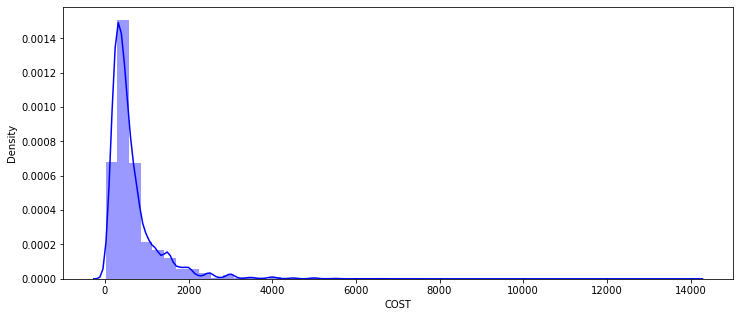

In [13]:
plt.figure(figsize=(12,5))
sns.distplot(df["COST"], color = 'b')

Observation:
    
The cost is distributed mostly in the range 0-2000,with the tail more towards right side which suggests mean is more than the median.


Printing unique values of cuisines

In [14]:
df["CUISINES"].unique()


array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [15]:
#calculating number of cuisines
l=df['CUISINES'].str.count(',').add(1)

print("Maximum number of cuisines :",l.max(),"\n","Minimum number of cuisines:",l.min())


Maximum number of cuisines : 8 
 Minimum number of cuisines: 1


Creating a column with number of cuisines

In [16]:
df['count'] = df['CUISINES'].str.split(",").str.len()


In [278]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [18]:
df["CITY"].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powa

As the city also contain location and not just city name so adding them together in one column

In [19]:
df['Location']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'],inplace=True)

Using the below function to acquire city names

In [20]:
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array


correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(df.Location,correct_names)

print(len(names_array))
df['Location']=names_array

12690


In [283]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200,Thane
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30.0,1500,Chennai
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800,Chennai
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24.0,800,Mumbai
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165.0,300,Mumbai


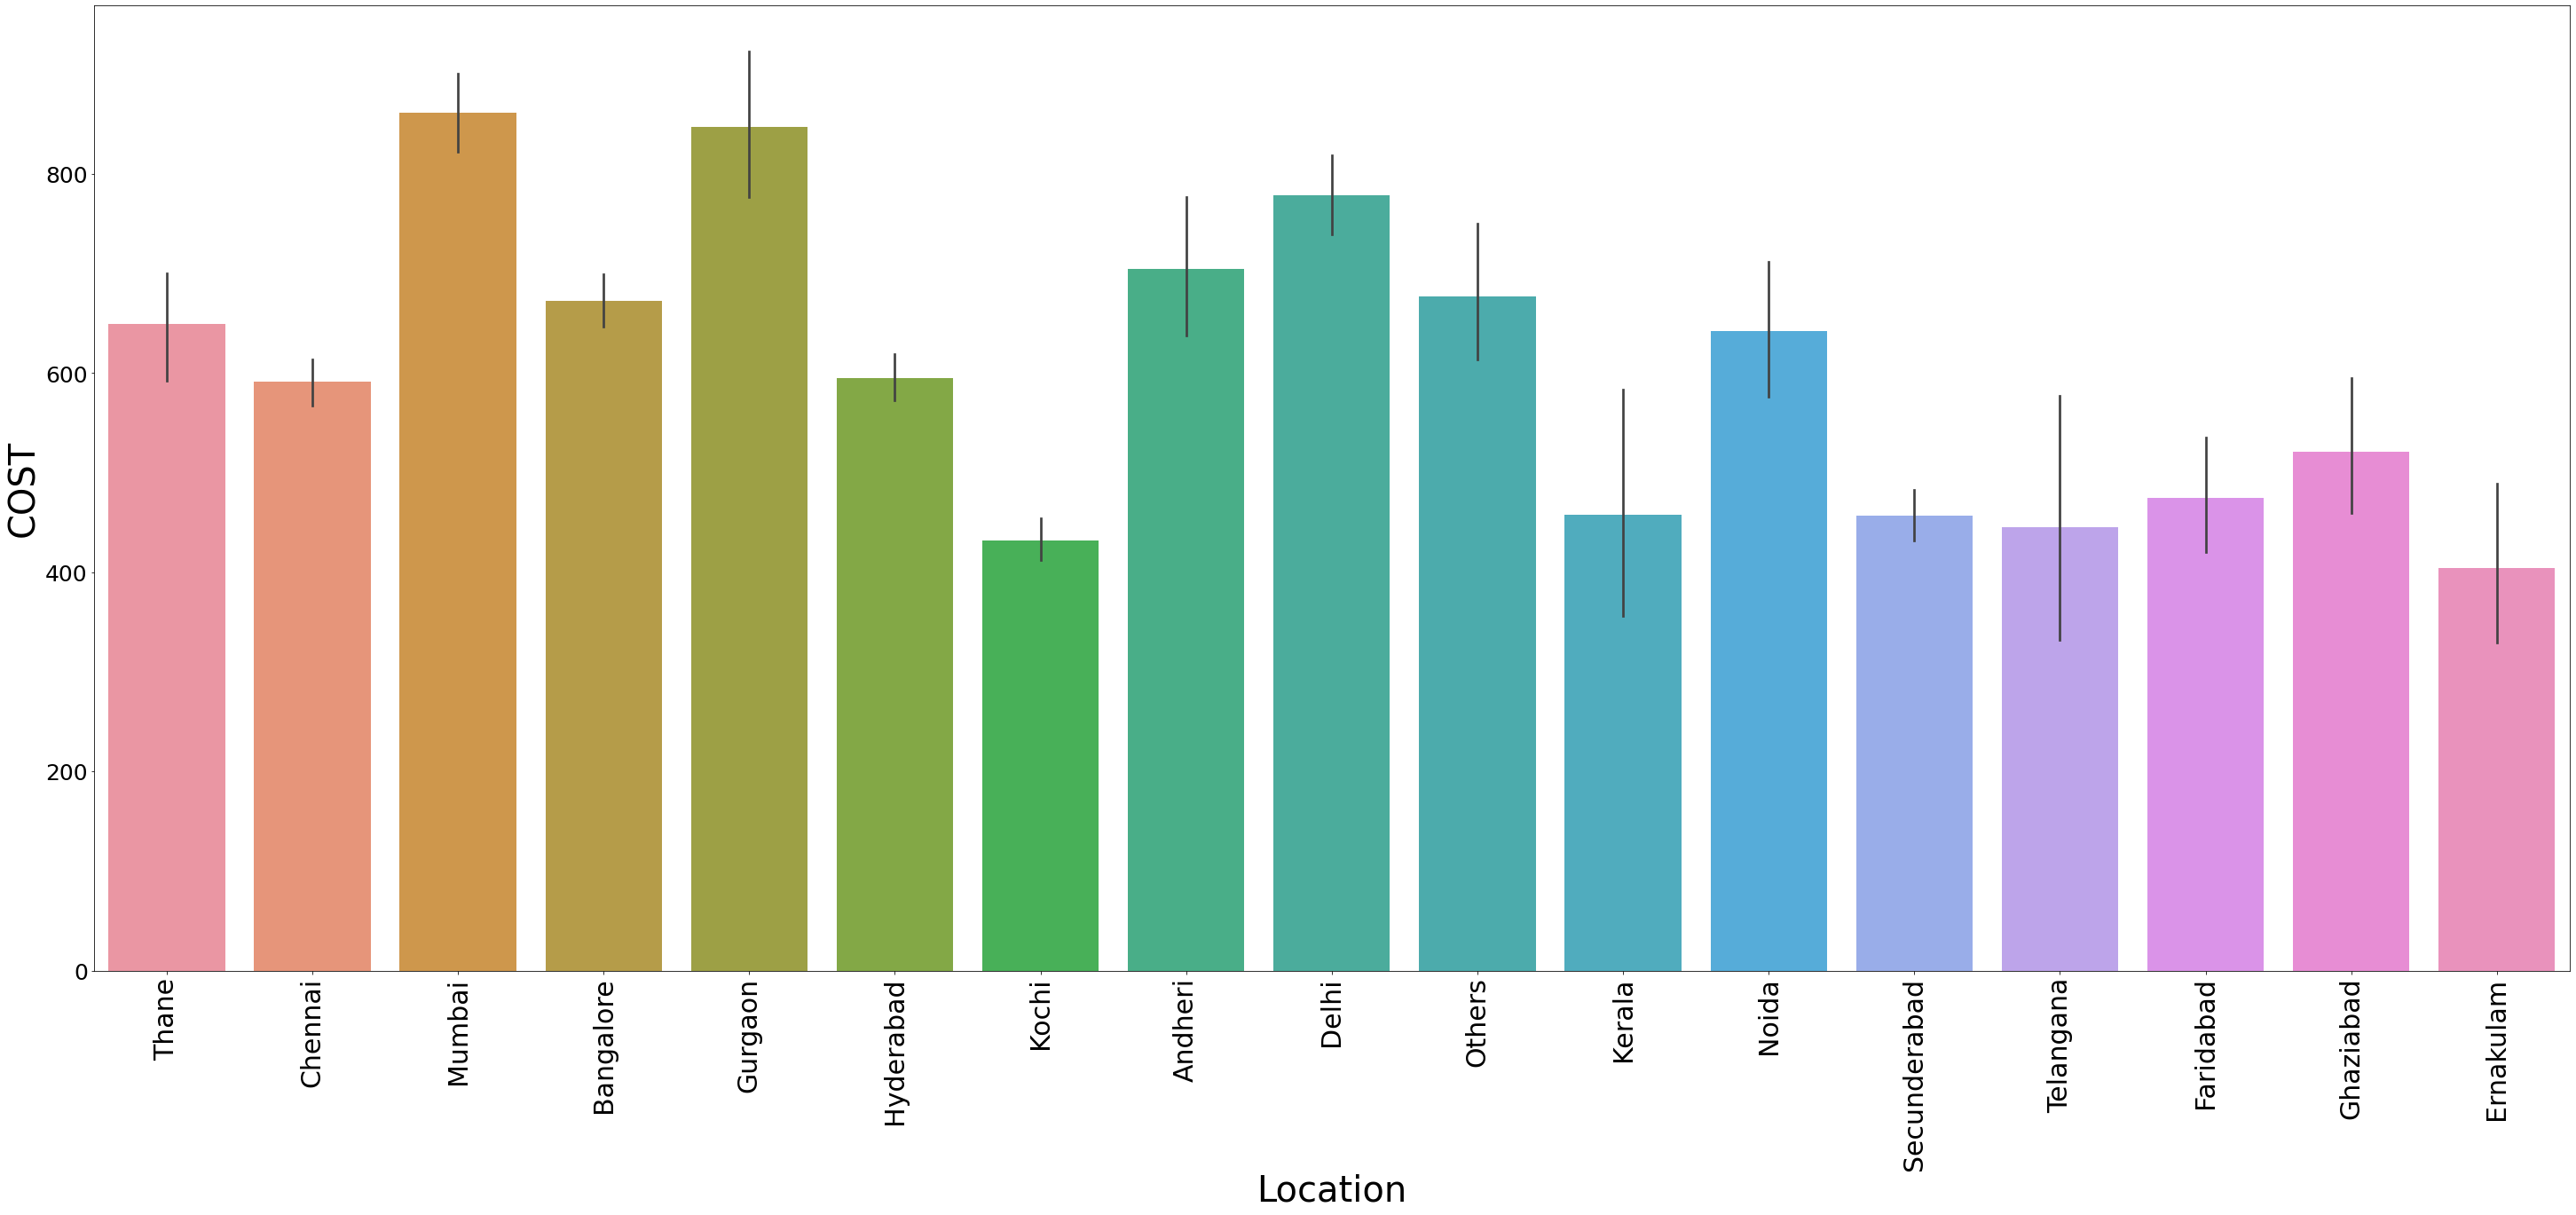

In [284]:
plt.figure(figsize=(50,20))
plt.xlabel("Location", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="Location",y="COST",data=df)

Observation: Mumbai has the highest cost,followed by Gurgaon and least in Kochi

In [285]:
df["TITLE"].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [286]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list

In [287]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))
df_title.replace(to_replace =np.NaN, 
                 value =0,inplace=True)

In [288]:
df_title.head()


,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [289]:
df['count'] = df['CUISINES'].str.split(",").str.len()
#finding number of cuisines in a restaurant

cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))
df_cuisines.replace(to_replace =np.NaN, 
                 value =0,inplace=True)


In [157]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location,count
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200,Thane,3
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),4.2,30.0,1500,Chennai,3
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800,Chennai,4
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),4.1,24.0,800,Mumbai,2
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),3.8,165.0,300,Mumbai,1


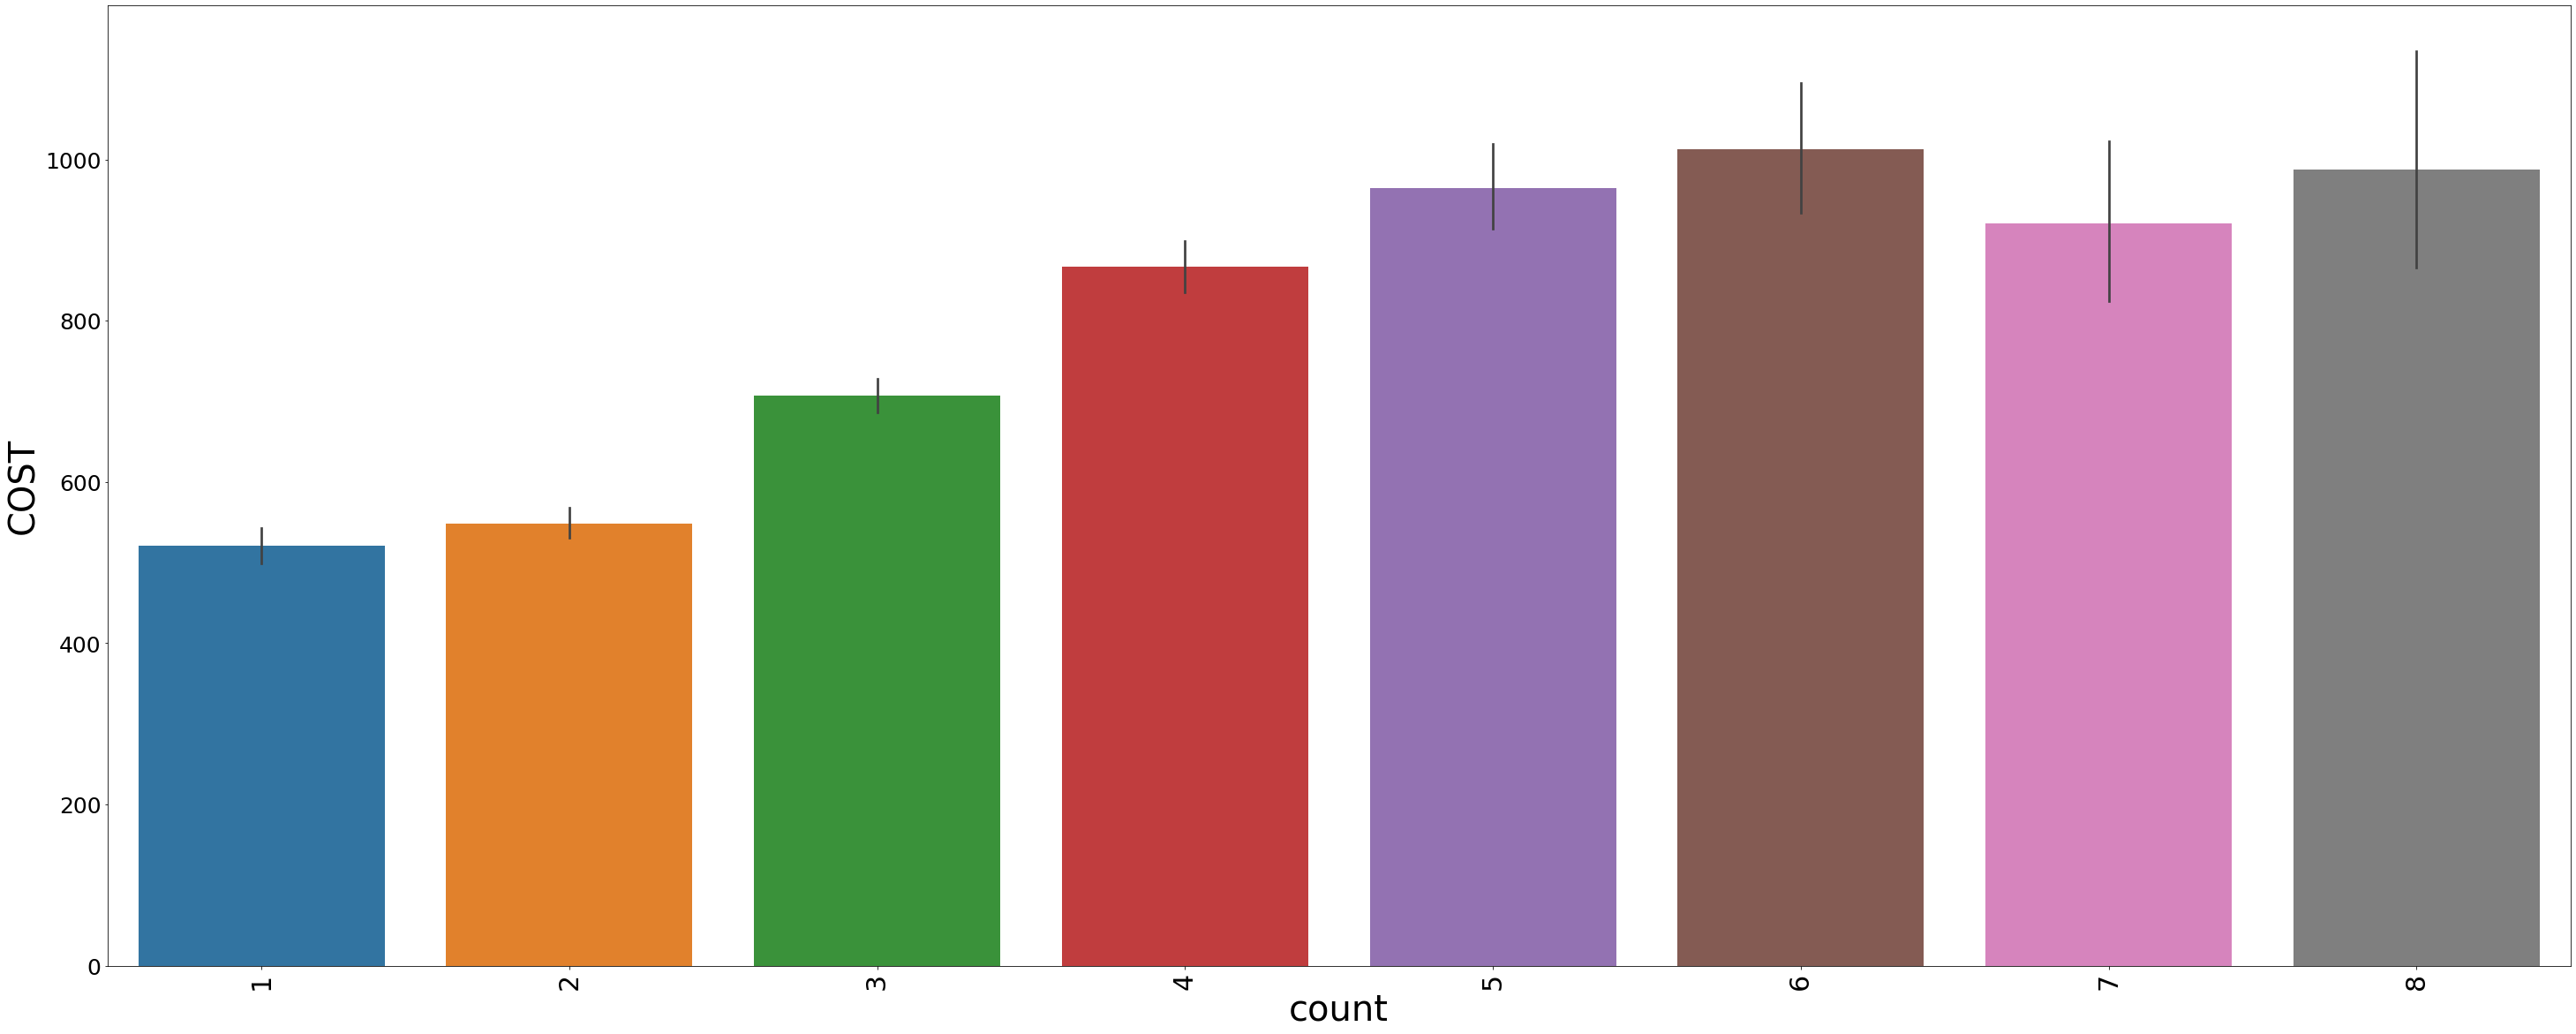

In [290]:
plt.figure(figsize=(50,20))
plt.xlabel("count", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="count",y="COST",data=df)

Observation: Cuisine count with 6 has more cost than compared to others
    

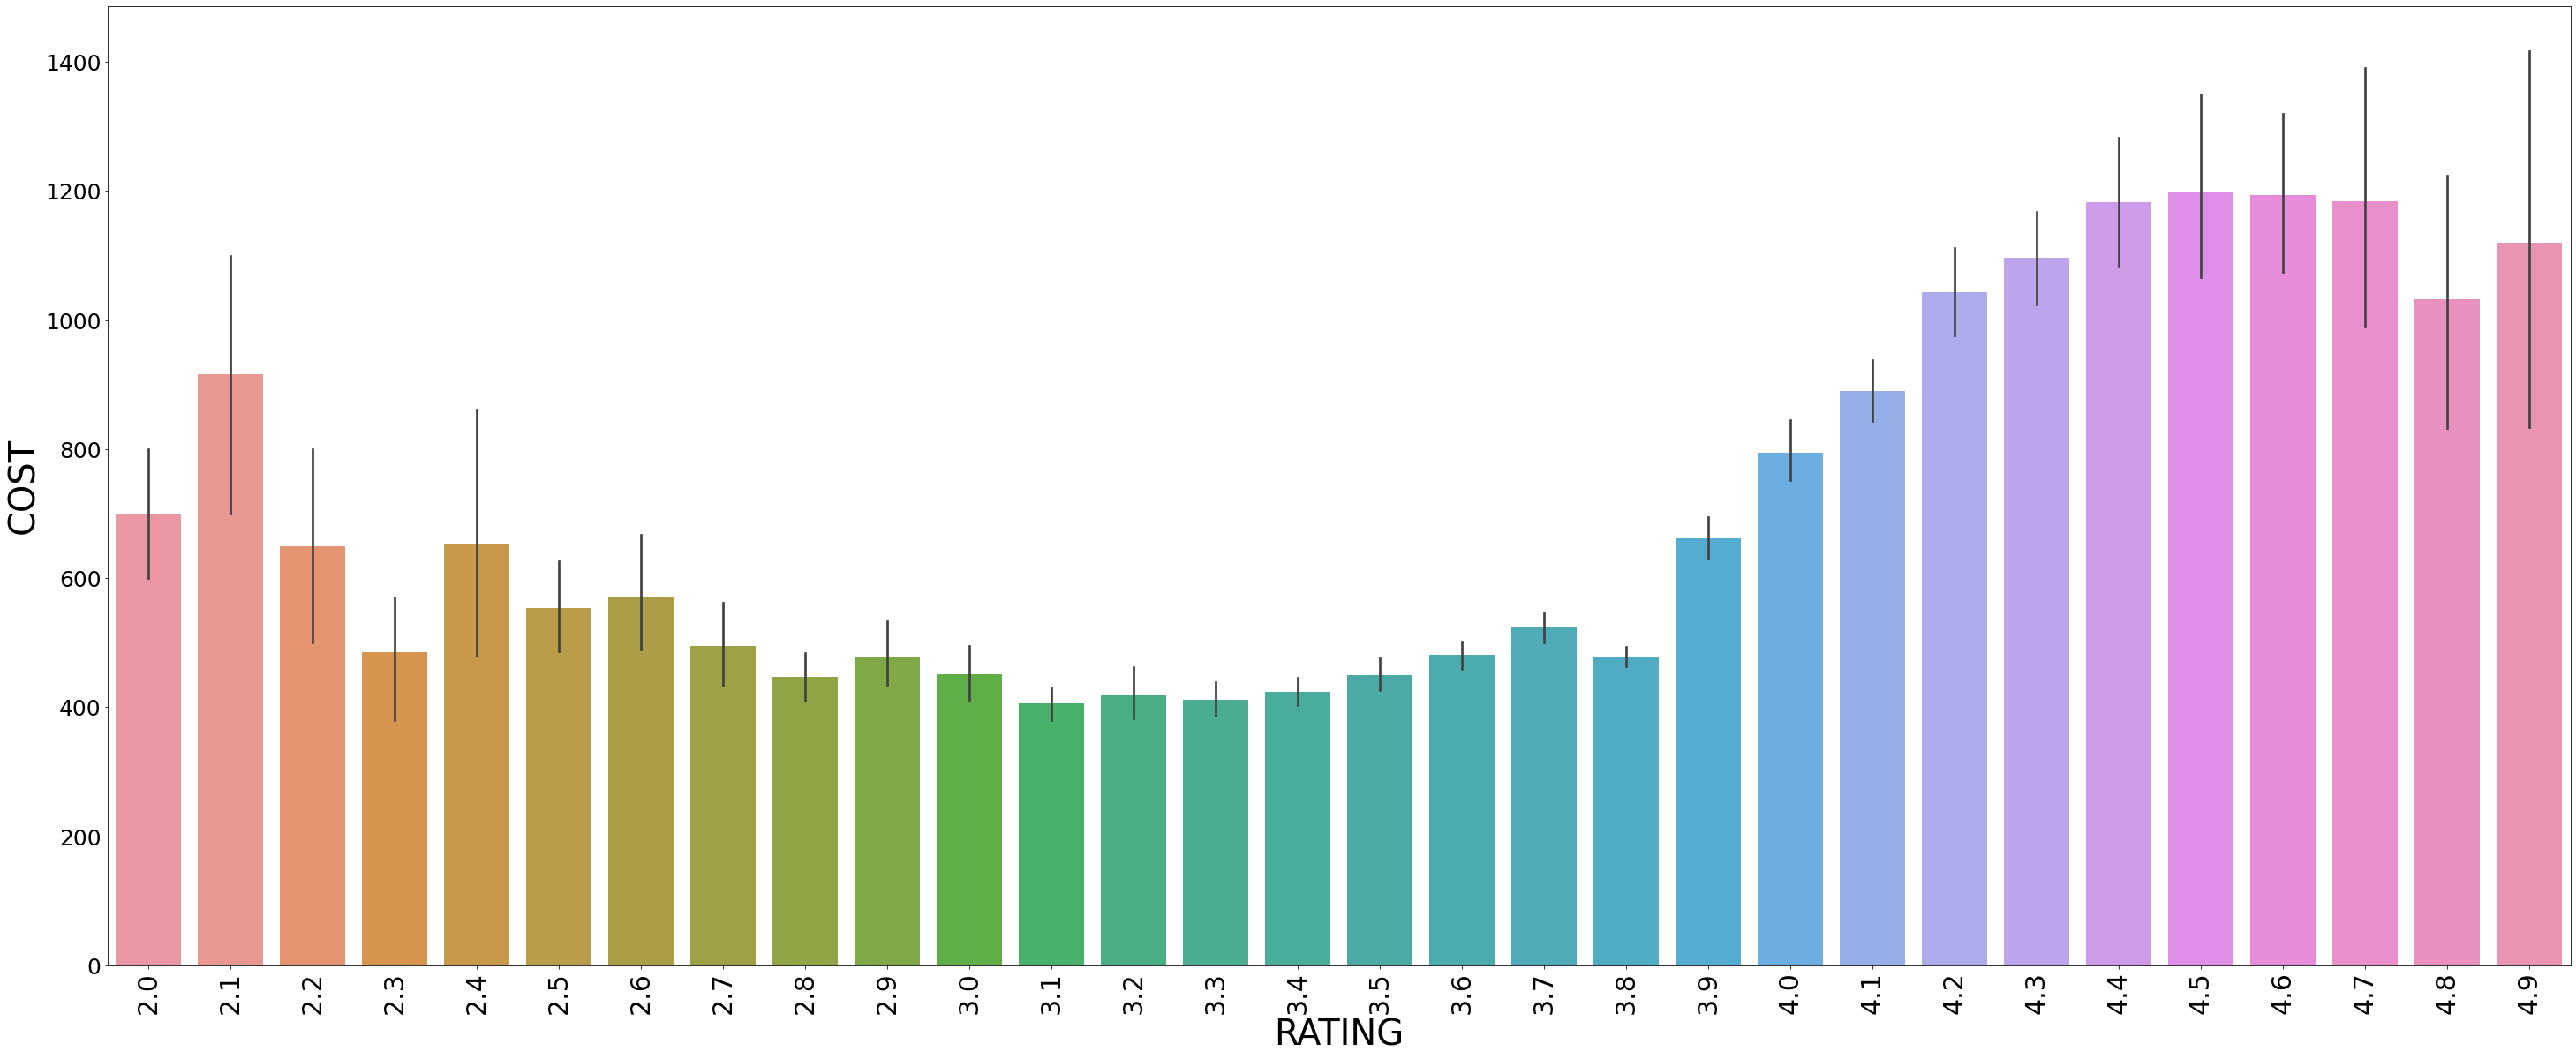

In [291]:
plt.figure(figsize=(50,20))
plt.xlabel("RATING", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="RATING",y="COST",data=df)

Text(0, 0.5, 'cost')

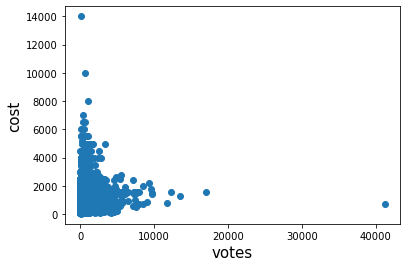

In [160]:
plt.scatter(x=df["VOTES"],y=df["COST"])
plt.xlabel("votes", fontsize=15)
plt.ylabel("cost", fontsize=15)

In [292]:
df_new = pd.concat([df,df_title], axis=1)
df_new.drop(columns=["TITLE","CUISINES",'RESTAURANT_ID',"TIME"],axis=1,inplace=True)

In [165]:
df_new

,RESTAURANT_ID,RATING,VOTES,COST,Location,count,Malwani,Goan,North Indian,Asian,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,9438,3.6,49.0,1200,Thane,3,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13198,4.2,30.0,1500,Chennai,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10915,3.8,221.0,800,Chennai,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6346,4.1,24.0,800,Mumbai,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15387,3.8,165.0,300,Mumbai,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,3.8,546.0,500,Hyderabad,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12686,9686,4.3,1214.0,1800,Mumbai,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12687,11133,4.0,608.0,1300,Mumbai,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12688,6134,3.5,32.0,400,Chennai,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_new["Location"] = labelencoder.fit_transform(df_new["Location"])


In [295]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new))
threshold=3
df_av =df_new[(z < 3).all(axis=1)]
#removing outliers
print(df_av.shape,"\n",df_new.shape)
#printing the shape after removing outliers

(7633, 29) 
 (12690, 29)


Observation after removing outliers , a lot of rows are dropped so we wont remove outliers and continue like this 

In [296]:
corr_matrix_price=df_new.corr()
corr_matrix_price["COST"].sort_values(ascending=False)

COST              1.000000
FINE DINING       0.612405
RATING            0.318653
BAR               0.315380
VOTES             0.251294
CASUAL DINING     0.242909
LOUNGE            0.228608
count             0.227976
PUB               0.142727
CLUB              0.123628
MICROBREWERY      0.121704
COCKTAIL BAR      0.065727
CAFÉ              0.022066
IRANI CAFE        0.018266
Location         -0.003353
MEAT SHOP        -0.004216
CONFECTIONERY    -0.009349
PAAN SHOP        -0.016949
DHABA            -0.025513
FOOD TRUCK       -0.030127
FOOD COURT       -0.034188
MESS             -0.041313
KIOSK            -0.047207
SWEET SHOP       -0.065009
BEVERAGE SHOP    -0.087889
BAKERY           -0.096356
None             -0.111998
DESSERT PARLOR   -0.116858
QUICK BITES      -0.369266
Name: COST, dtype: float64

In [297]:
x_p=df_new.drop("COST",axis=1)
y=df_new["COST"]

In [298]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_p)
x=sc.transform(x_p)
x=pd.DataFrame(x,columns=x_p.columns)
#scaling the columns of x_ap

In [299]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state = 42,test_size=0.20)


In [300]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


In [301]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    m.fit(X_train,Y_train)
    print("score of ",m, "is:",m.score(X_train,Y_train))
    predm=m.predict(X_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(Y_test,predm))
    print("Mean squared error:",mean_squared_error(Y_test,predm))
    print("r2 score :",r2_score(Y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.6650300931366357
ERROR:
 Mean absolute error: 206.84243402788357
Mean squared error: 115720.76092444744
r2 score : 0.6784640123302023


score of  DecisionTreeRegressor() is: 0.9916716847934107
ERROR:
 Mean absolute error: 255.48611384190806
Mean squared error: 235747.78553565513
r2 score : 0.3449628531853134


score of  KNeighborsRegressor() is: 0.777340787186902
ERROR:
 Mean absolute error: 199.74893617021277
Mean squared error: 114748.88302600473
r2 score : 0.6811644242310041


score of  SVR() is: 0.1956471746227989
ERROR:
 Mean absolute error: 270.7669824478087
Mean squared error: 281343.57886766107
r2 score : 0.21827263506476124


score of  Lasso() is: 0.6649743037160334
ERROR:
 Mean absolute error: 206.69398636922034
Mean squared error: 115698.8817466383
r2 score : 0.6785248047324477


score of  Ridge() is: 0.665030085642532
ERROR:
 Mean absolute error: 206.8457801858734
Mean squared error: 115719.05276190511
r2 score : 0.6784687585462292


score

In [302]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    print("Cross val score of :",m,cross_val_score(m,x,y,cv=5,scoring="r2").mean())



Cross val score of : LinearRegression() 0.6650459732487615
Cross val score of : DecisionTreeRegressor() 0.40239743204684614
Cross val score of : KNeighborsRegressor() 0.666787266709799
Cross val score of : SVR() 0.19709370028797757
Cross val score of : Lasso() 0.6650312449947209
Cross val score of : Ridge() 0.6650469564356433
Cross val score of : ElasticNet() 0.616832275730092
Cross val score of : AdaBoostRegressor() -0.18064906815844264


In [342]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'n_jobs':[-1]
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y)
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}


In [347]:
knn=KNeighborsRegressor(leaf_size= 2, n_jobs= -1, n_neighbors= 10, weights= 'uniform')
knn.fit(X_train,Y_train)
ypred_knn=knn.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred_knn))
print("Mean squared error:",mean_squared_error(Y_test,ypred_knn))
print("r2 score :",r2_score(Y_test,ypred_knn))
print("score of ",knn, "is:",knn.score(X_train,Y_train))
print("\n")

 Mean absolute error: 191.37785657998424
Mean squared error: 107327.72815602834
r2 score : 0.7017844784175323
score of  KNeighborsRegressor(leaf_size=2, n_jobs=-1, n_neighbors=10) is: 0.7395119853535438




In [303]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
param={'alpha':[0.001,0.01,0.1,1],'random_state':(42,100)}
cv=GridSearchCV(ridge,param)
cv.fit(x,y)
cv.best_params_

{'alpha': 1, 'random_state': 42}

In [304]:
model=Ridge(alpha=1,random_state=42)
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred))
print("Mean squared error:",mean_squared_error(Y_test,ypred))
print("r2 score :",r2_score(Y_test,ypred))
print("\n")

 Mean absolute error: 206.8457801858734
Mean squared error: 115719.05276190511
r2 score : 0.6784687585462292




In [305]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
param={'alpha':[0.001,0.01,0.1,1],'random_state':(42,100)}
cvl=GridSearchCV(lasso,param)
cvl.fit(x,y)
cvl.best_params_

{'alpha': 0.1, 'random_state': 42}

In [340]:
model=Lasso(alpha=1,random_state=42)
model.fit(X_train,Y_train)
ypredl=model.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred_new))
print("Mean squared error:",mean_squared_error(Y_test,ypred_new))
print("r2 score :",r2_score(Y_test,ypred_new))
print("\n")

 Mean absolute error: 206.69398636922034
Mean squared error: 115698.8817466383
r2 score : 0.6785248047324477




In [350]:
KNN=KNeighborsRegressor()
adb=AdaBoostRegressor(base_estimator=KNN,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(X_train,Y_train)
predab=adb.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,predab))
print("Mean squared error:",mean_squared_error(Y_test,predab))
print("r2 score :",r2_score(Y_test,predab))
print("score of ",adb, "is:",adb.score(X_train,Y_train))
print("Cross val score:",cross_val_score(adb,x,y,cv=5,scoring="r2").mean())

print("\n")


 Mean absolute error: 207.6748620961387
Mean squared error: 125725.2125137904
r2 score : 0.6506661375394007
score of  AdaBoostRegressor(base_estimator=KNeighborsRegressor(), learning_rate=1,
                  n_estimators=6, random_state=42) is: 0.856842838760485
Cross val score: 0.6147811284830883




In [308]:
l=Lasso()
adb=AdaBoostRegressor(base_estimator=l,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(X_train,Y_train)
predab=adb.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,predab))
print("Mean squared error:",mean_squared_error(Y_test,predab))
print("r2 score :",r2_score(Y_test,predab))
print("score of ",adb, "is:",adb.score(X_train,Y_train))
print("Cross val score:",cross_val_score(adb,x,y,cv=5,scoring="r2").mean())

print("\n")


 Mean absolute error: 248.05192573996996
Mean squared error: 187717.68914218782
r2 score : 0.4784169054951827
score of  AdaBoostRegressor(base_estimator=Lasso(), learning_rate=1, n_estimators=6,
                  random_state=42) is: 0.5127790280428663
Cross val score: 0.4720800082121621




Text(0.5, 0, 'Original value')

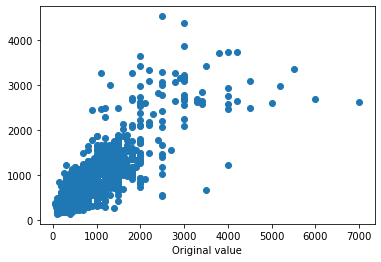

In [349]:
plt.scatter(x=Y_test,y=ypred_knn)
plt.xlabel("Original value")

In [232]:
df_cost=pd.DataFrame(ypred_new)
df_cost

,0
0,458.122467
1,455.415608
2,618.969290
3,831.539207
4,435.140269
...,...
2533,802.189132
2534,547.864900
2535,384.638572
2536,120.162607


In [ ]:
Using TEST to predict performining similiar eda as on train dataset

In [310]:
test = pd.read_excel('Data_Test.xlsx')

In [311]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [312]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [313]:
test["VOTES"] = test['VOTES'].str.split(" ").str[0]
test["VOTES"]= pd.to_numeric(test["VOTES"])
test["RATING"]=pd.to_numeric(test["RATING"], errors='coerce')

In [314]:
columns=["CITY","LOCALITY"]
for i in columns:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [315]:
test["VOTES"]=test["VOTES"].fillna(test["VOTES"].median())
test["RATING"]=test["RATING"].fillna(test["RATING"].median())

In [316]:
test['Location']=test['CITY']+' '+test['LOCALITY']
test.drop(columns=['CITY','LOCALITY'],inplace=True)

In [317]:
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array


correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(test.Location,correct_names)

print(len(names_array))
test['Location']=names_array

4231


In [319]:
title_list=[]
for row in test['TITLE']:
    title_list.append(list(row.split(',')))
test['TITLE']=title_list

In [320]:
test_title=test['TITLE'].apply(lambda x: pd.Series(1, x))
test_title.replace(to_replace =np.NaN, 
                 value =0,inplace=True)

In [321]:
test['count'] = test['CUISINES'].str.split(",").str.len()


In [322]:
test_new = pd.concat([test,test_title], axis=1)
test_new.drop(columns=["TITLE","CUISINES","TIME","RESTAURANT_ID"],axis=1,inplace=True)

In [323]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test_new["Location"] = labelencoder.fit_transform(test_new["Location"])

In [334]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test_new)
X=sc.transform(test_new)
X=pd.DataFrame(X,columns=test_new.columns)

In [325]:
X_train.shape

(10152, 28)

In [326]:
test_new.head()

,RATING,VOTES,Location,count,CASUAL DINING,QUICK BITES,None,FOOD TRUCK,DESSERT PARLOR,BAR,...,FOOD COURT,KIOSK,MESS,MICROBREWERY,CLUB,COCKTAIL BAR,MEAT SHOP,CONFECTIONERY,PAAN SHOP,BHOJANALYA
0,4.3,564.0,12,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.2,61.0,11,4,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8,350.0,11,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.8,1445.0,5,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.6,23.0,10,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [327]:
df_new.columns

Index(['RATING', 'VOTES', 'COST', 'Location', 'count', 'CASUAL DINING', 'BAR',
       'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'BEVERAGE SHOP', 'IRANI CAFE', 'BAKERY', 'None', 'PUB', 'FINE DINING',
       'SWEET SHOP', 'LOUNGE', 'FOOD COURT', 'FOOD TRUCK', 'MESS', 'KIOSK',
       'CLUB', 'CONFECTIONERY', 'DHABA', 'MEAT SHOP', 'COCKTAIL BAR',
       'PAAN SHOP'],
      dtype='object')

In [328]:
test_new.columns

Index(['RATING', 'VOTES', 'Location', 'count', 'CASUAL DINING', 'QUICK BITES',
       'None', 'FOOD TRUCK', 'DESSERT PARLOR', 'BAR', 'LOUNGE',
       'BEVERAGE SHOP', 'PUB', 'CAFÉ', 'BAKERY', 'SWEET SHOP', 'DHABA',
       'FINE DINING', 'IRANI CAFE', 'FOOD COURT', 'KIOSK', 'MESS',
       'MICROBREWERY', 'CLUB', 'COCKTAIL BAR', 'MEAT SHOP', 'CONFECTIONERY',
       'PAAN SHOP', 'BHOJANALYA'],
      dtype='object')

In [331]:
test_new.drop("BHOJANALYA",axis=1,inplace=True)

In [332]:
df_new.head()

,RATING,VOTES,COST,Location,count,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,3.6,49.0,1200,16,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.2,30.0,1500,2,3,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8,221.0,800,2,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.1,24.0,800,11,2,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8,165.0,300,11,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
adb=AdaBoostRegressor(base_estimator=KNN,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(X_train,Y_train)
predtest=adb.predict(X)    

In [353]:
predtest

array([980., 500., 770., ..., 380., 270., 330.])

In [354]:
df_output=pd.DataFrame(predtest)
df_output.to_csv("restaurant_cost.csv")

In [355]:
import joblib
joblib.dump(knn,"restaurant_cost.pkl")

['restaurant_cost.pkl']